Install necessary python libraries

In [1]:
import sys
!{sys.executable} -m pip install gitpython pandas requests xarray

Clone github repository to /tmp folder

In [8]:
from git import Repo
repo = Repo.clone_from("git@github.com:metocean/storm_surge.git", "/tmp/storm_surge")

Download LINZ data

In [19]:
sys.path.append("/tmp/storm_surge/storm_surge/data_processing/linz_waterlevel")
# sys.path.append("/source/storm_surge/storm_surge/data_processing/linz_waterlevel")
from linz_download import LINZ_Site
from datetime import datetime

# user-defined
site_name = "AUCT"
output_file = "/tmp/AUCT_raw.nc"
readme_file = "/tmp/AUCT_readme.txt"
tstart = datetime(2021, 1, 1)
tend = datetime(2022, 10, 1)

site = LINZ_Site(site_name, tstart=tstart, tend=tend)
print('downloading data')
site.get_data()
print('saving to netcdf')
site.to_netcdf(output_file)
print('downloading readme')
site.get_readme(readme_file)

downloading data
Year:  2021
Year:  2022
Year:  2021
Year:  2022
saving to netcdf
downloading readme


Plot LINZ data

<xarray.Dataset>
Dimensions:    (time: 918324, sensor: 2, site: 1)
Coordinates:
  * time       (time) datetime64[ns] 2021-01-01 ... 2022-10-01T23:59:00
  * sensor     (sensor) int64 40 41
Dimensions without coordinates: site
Data variables:
    elev       (sensor, time) float32 ...
    longitude  (site) float64 ...
    latitude   (site) float64 ...
Attributes:
    site_name:      AUCT
    location_name:  Auckland

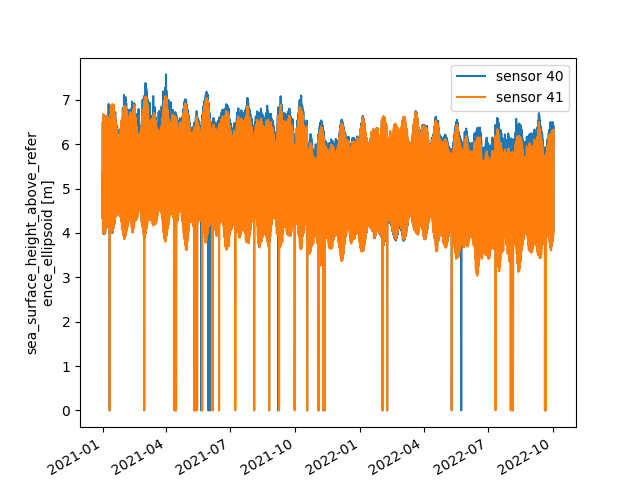

In [3]:
%matplotlib widget
import xarray as xr
import matplotlib.pyplot as plt

ds = xr.open_dataset(output_file)
ds.elev.sel(sensor=40, drop=True).plot(label='sensor 40');
ds.elev.sel(sensor=41, drop=True).plot(label='sensor 41');
plt.legend(loc='best')
ds
